## Observations and Insights 

In [ ]:
#Observation There was a correlation between mouse weight and tumor volume
#Observation  Of the four most promising drugs (Capomulin, Ramicane, Infubinol, and Ceftamin), Infubinol had the highest variance, with the smallest number of subjects.  More research may need to be done
#Observation  Gender did not seem to affect results

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
full_dataset = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

In [5]:
full_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the DataFrame.


In [6]:
full_dataset["Mouse ID"].value_counts()

g989    13
r701    10
v923    10
p136    10
r604    10
        ..
d133     1
u153     1
x226     1
b447     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
unique_mice = full_dataset["Mouse ID"].unique()
unique_mice

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [8]:
len(unique_mice)

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [9]:
duplicate_mouse_ids = full_dataset.loc[full_dataset.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 


In [10]:
duplicate_mouse_data = full_dataset.loc[full_dataset["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [11]:
clean_full_dataset = full_dataset[full_dataset["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_full_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice in the clean DataFrame.


In [12]:
clean_full_dataset["Mouse ID"].value_counts()

r701    10
w422    10
a492    10
l471    10
u196    10
        ..
x226     1
x336     1
v199     1
t573     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [13]:
clean_full_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
drug_regimen_groupby = clean_full_dataset.groupby(["Drug Regimen"])
drug_regimen_groupby.head()

mean = []
median = []

drugregmean = drug_regimen_groupby.mean()["Tumor Volume (mm3)"]
drugregmedian = drug_regimen_groupby.median()["Tumor Volume (mm3)"]
drugregvariance = drug_regimen_groupby.var()["Tumor Volume (mm3)"]
drugregstddev = drug_regimen_groupby.std()["Tumor Volume (mm3)"]
drugregSEM = drug_regimen_groupby.sem()["Tumor Volume (mm3)"]



In [15]:
drugregmean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [16]:
drugregmedian

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [17]:
drugregvariance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [18]:
drugregstddev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [19]:
drugregSEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [20]:
summary_table_df = pd.DataFrame({
    "Mean Tumor Volume": drugregmean, 
    "Median Tumor Volume": drugregmedian, 
    "Tumor Variance": drugregvariance,
    "Tumor Standard Deviation": drugregstddev,
    "Tumor SEM": drugregSEM})
#[["drugregmean","drugregmedian","drugregvariance","drugregstddev","drugregSEM"]]
summary_table_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

In [21]:
mice_per_drug = clean_full_dataset["Drug Regimen"].value_counts()
mice_per_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

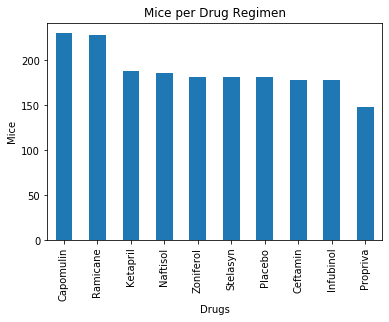

In [22]:
mice_per_drug.plot(kind="bar")
plt.title("Mice per Drug Regimen")
plt.xlabel("Drugs")
plt.ylabel("Mice")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

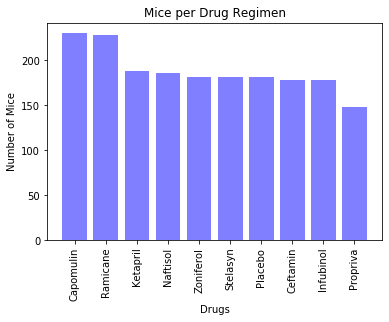

In [23]:
mice = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x_axis = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Ceftamin", "Infubinol", "Propriva"]

plt.title("Mice per Drug Regimen")
plt.xlabel("Drugs")
plt.ylabel("Number of Mice")

plt.bar(x_axis, mice, color='b', alpha=0.5, align="center")
plt.xticks(rotation = "vertical")

## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [24]:
mice_gender = clean_full_dataset["Sex"].value_counts()
mice_gender 

Male      958
Female    922
Name: Sex, dtype: int64

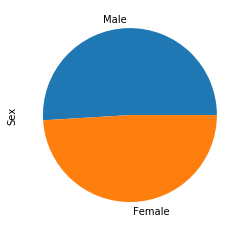

In [25]:
mice_gender.plot(kind = "pie")

([<matplotlib.patches.Wedge at 0x1a1e1b6b10>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

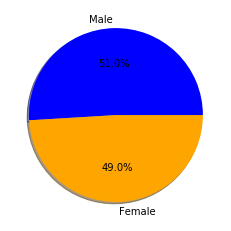

In [26]:
labels = ["Male", "Female"]

sizes = [958, 922]

colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin). Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
final_cap_weight = []
final_ram_weight = []
final_inf_weight = []
final_def_weight = []

for weight in final_cap_weight 

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [27]:
capomulin_mouse_data = clean_full_dataset.loc[clean_full_dataset["Drug Regimen"] == "Capomulin"]
capomulin_mouse_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [28]:
x_axis = np.arange(0, 50, 5)
x_axis

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [29]:
tv = capomulin_mouse_data["Tumor Volume (mm3)"].head(10)
tv

10    45.000000
11    43.878496
12    37.614948
13    38.177232
14    36.866876
15    33.949940
16    32.959671
17    28.328531
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

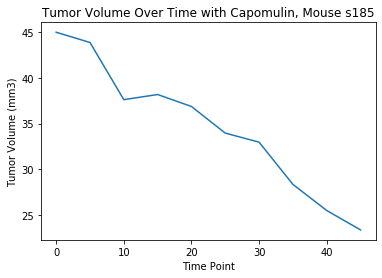

In [30]:
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time with Capomulin, Mouse s185")

plt.plot(x_axis, tv)

In [31]:
capomulin_mouse_data = clean_full_dataset.loc[clean_full_dataset["Drug Regimen"] == "Capomulin"]
capomulin_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



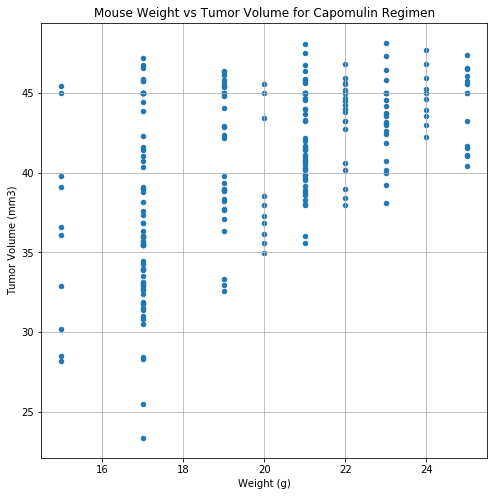

In [32]:
capomulin_mouse_data = clean_full_dataset.loc[clean_full_dataset["Drug Regimen"] == "Capomulin"]

capomulin_mouse_data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Mouse Weight vs Tumor Volume for Capomulin Regimen")
plt.show()


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [33]:
weight = capomulin_mouse_data.iloc[:,4]
tumor_volume = capomulin_mouse_data.iloc[:,6]
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


The r-squared is: 0.2763600223455911


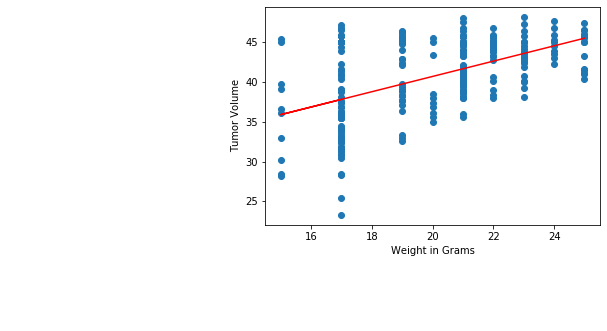

In [38]:
x_values = capomulin_mouse_data['Weight (g)']
y_values = capomulin_mouse_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight in Grams')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()